In [2]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

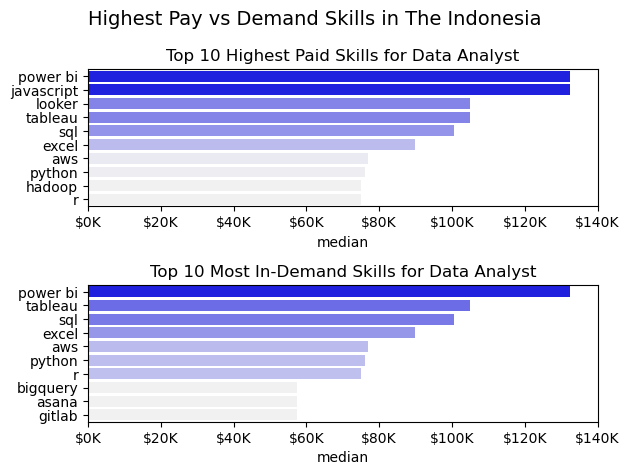

In [9]:
job_country = "Indonesia"
job_title_short = "Data Analyst"

df_first = df[(df['job_title_short'] == job_title_short) & (df['job_country'] == job_country)].copy()

df_first = df_first.dropna(subset=['salary_year_avg'])

df_exploded = df_first.explode('job_skills')

df_exploded = df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

top_10_pay = df_exploded.sort_values(by='median', ascending=False).head(10)

top_10_demand = df_exploded.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)\

fig, ax = plt.subplots(2, 1)

dict_to_view = {
  f'Top 10 Highest Paid Skills for {job_title_short}' : top_10_pay,
  f'Top 10 Most In-Demand Skills for {job_title_short}' : top_10_demand
  }
for i, (title, col) in enumerate(dict_to_view.items()):
  # col.plot(kind='barh', y='median', legend='', ax=ax[i], title=title)
  sns.barplot(data=col, x='median', y=col.index, ax=ax[i], hue='median', legend='', palette='light:b')
  ax[i].set_title(title)
  ax[i].set_ylabel('')
  # ax[i].invert_yaxis()
  ax[i].set_xlim(0, 140_000)
  # ax[1].set_xlim(ax[0].get_xlim())
  ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.suptitle(f'Highest Pay vs Demand Skills in The {job_country}', fontsize=14)
fig.tight_layout()